<a href="https://colab.research.google.com/github/ApahSaroj/WPI/blob/main/ann_vs_mlr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/DATA/timeser.csv')
df.dropna(inplace=True)

df

,Date,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,01-Jan-14,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,02-Jan-14,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,03-Jan-14,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,04-Jan-14,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.60,0.299591,2.238750,0.01536,0.219282
4,05-Jan-14,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,28-Apr-15,7.60,5.6,224.0,8,370.0,16.14,92,24,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,29-Apr-15,7.30,5.6,266.0,96,434.0,20.56,96,32,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,30-Apr-15,5.10,5.8,290.0,12,487.0,37.35,60,44,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,01-May-15,7.40,6.4,230.0,72,385.0,20.06,70,42,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [4]:
df.describe()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
count,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000
mean,7.808880,7.436784,115.889278,62.251546,196.757361,8.911093,43.756701,24.387629,3.042495,0.512101,14.180745,1.291492,14.829563,0.089608,0.293930
std,0.411552,1.106868,47.332843,20.104135,81.181745,5.730719,17.846411,10.829170,2.306840,0.495054,9.297846,1.840738,14.662305,0.156697,0.132472
min,5.100000,4.200000,56.000000,8.000000,98.000000,2.190000,14.000000,2.000000,0.500000,0.059000,3.800000,0.003985,0.792000,0.000000,0.103531
25%,7.550000,6.700000,84.000000,50.000000,140.000000,5.290000,32.000000,16.000000,1.770000,0.249000,8.600000,0.246000,5.544000,0.023700,0.222014
50%,7.860000,7.400000,102.000000,56.000000,171.100000,7.100000,40.000000,22.000000,2.420000,0.312000,11.000000,0.535983,9.570000,0.046252,0.254719
75%,8.100000,8.100000,129.000000,72.000000,220.000000,10.240000,52.000000,28.000000,3.400000,0.466000,16.400000,1.526653,18.030000,0.091000,0.312652
max,8.570000,13.500000,308.000000,170.000000,502.000000,48.350000,146.000000,84.000000,18.020000,3.060000,73.300000,9.716972,104.480000,1.765000,1.604375


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 0 to 486
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        485 non-null    object 
 1   pH          485 non-null    float64
 2   DO          485 non-null    float64
 3   TDS         485 non-null    float64
 4   Alkalinity  485 non-null    int64  
 5   EC          485 non-null    float64
 6   Na          485 non-null    float64
 7   Ca          485 non-null    int64  
 8   Mg          485 non-null    int64  
 9   K           485 non-null    float64
 10  F           485 non-null    float64
 11  Cl          485 non-null    float64
 12  Nitrate     485 non-null    float64
 13  Sulphate    485 non-null    float64
 14  Phosphate   485 non-null    float64
 15  WPI         485 non-null    float64
dtypes: float64(12), int64(3), object(1)
memory usage: 64.4+ KB


In [6]:
df.shape

(485, 16)

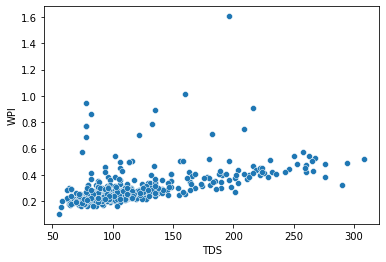

In [7]:
sns.scatterplot(x='TDS', y='WPI', data = df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f569c2d5910>,
      dtype=object)

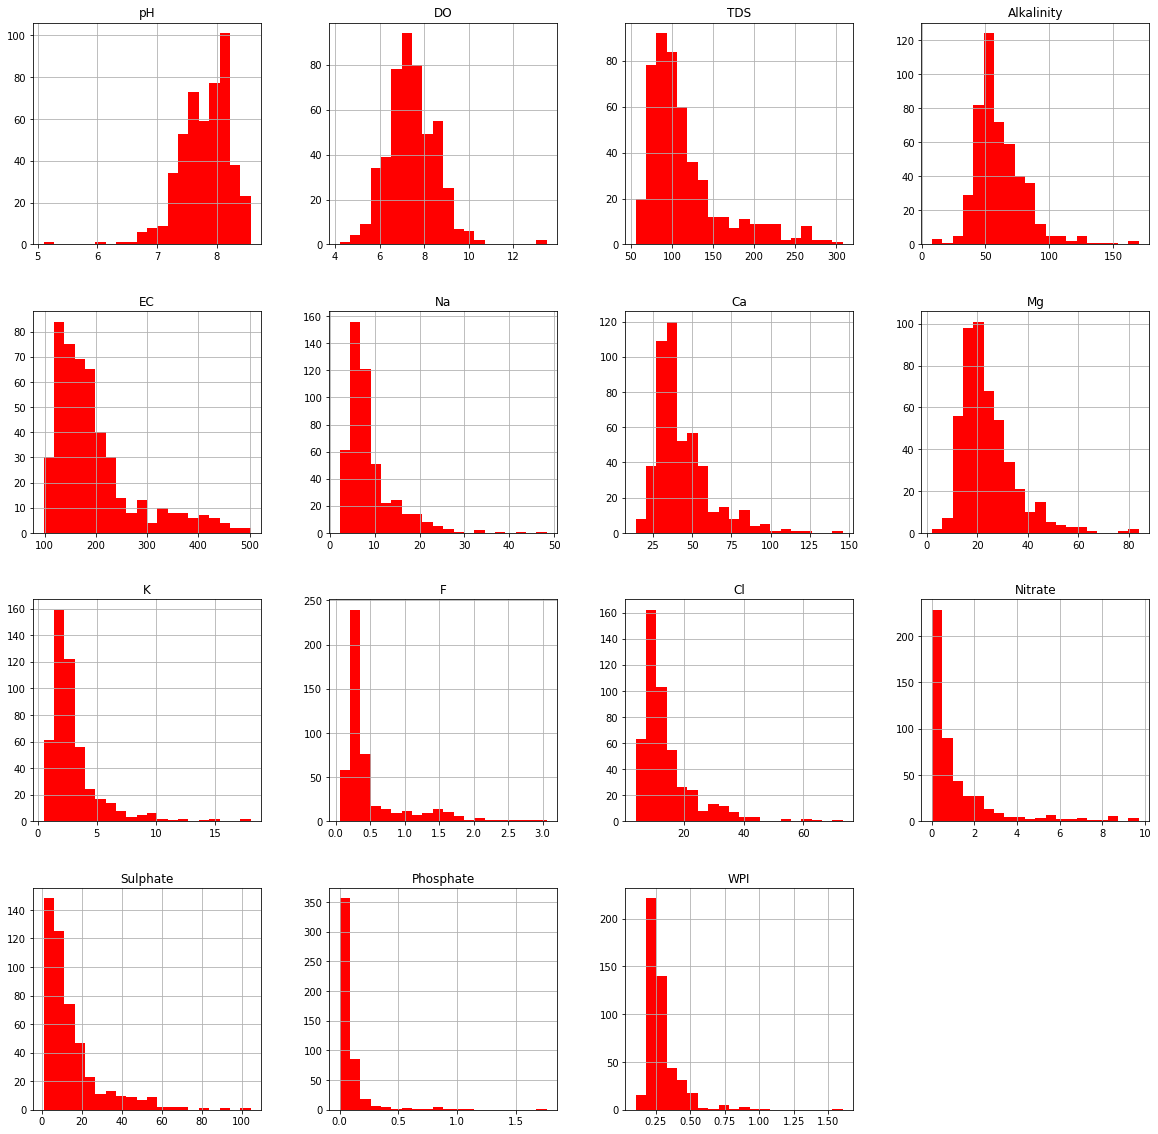

In [8]:
# Plot distrbutions
df.hist(bins=20, figsize=(20,20), color='r')

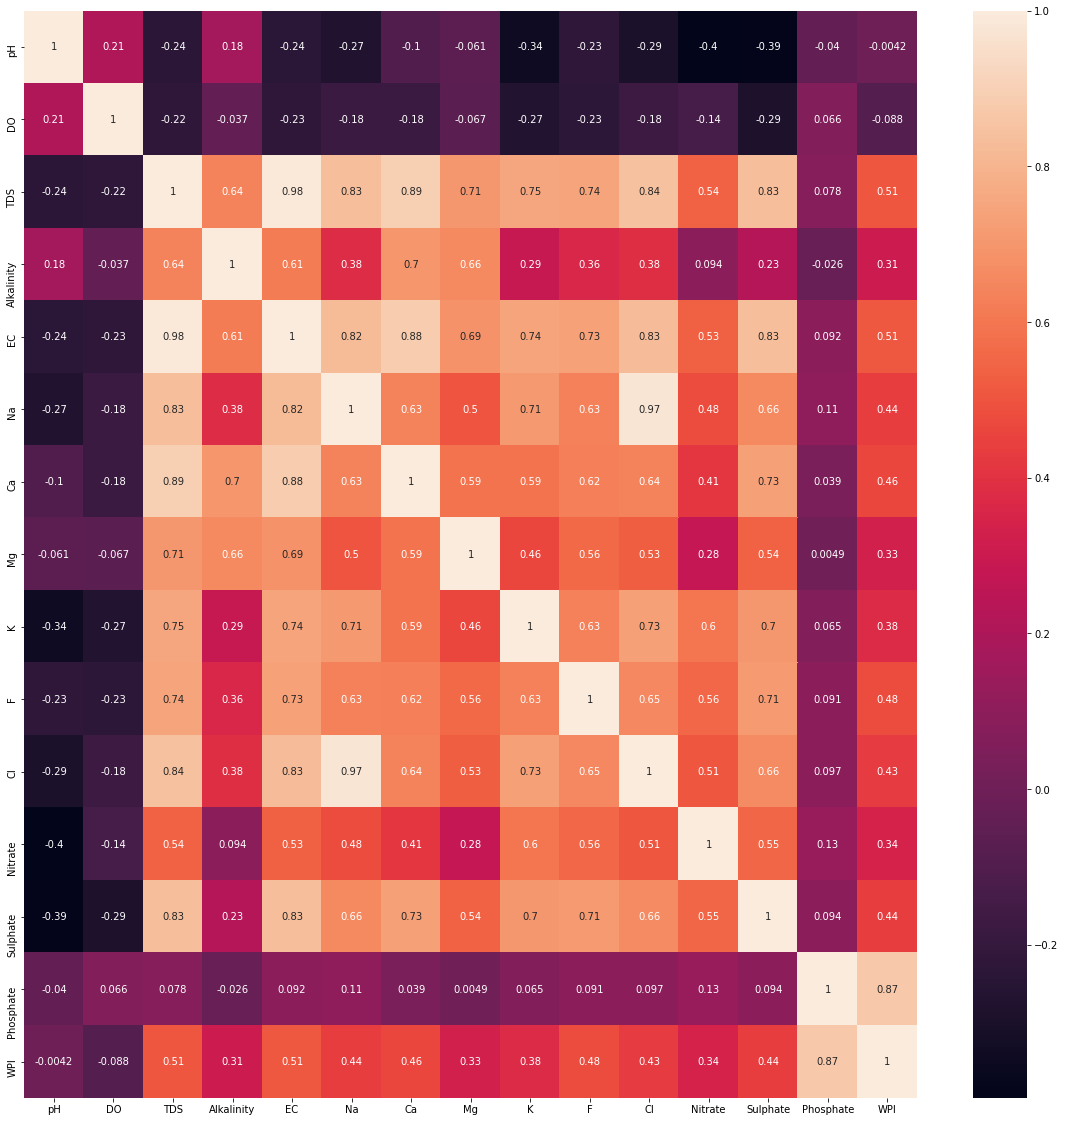

In [9]:
# Plot correlations

f,ax = plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)

In [10]:
selected_features = ['pH',	'DO',	'TDS',	'Alkalinity',	'EC',	'Na',	'Ca',	'Mg',	'K',	'F',	'Cl',	'Nitrate',	'Sulphate',	'Phosphate']

In [11]:
X = df[selected_features]

In [12]:
X

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate
0,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.80,0.758000,6.534660,0.06211
1,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.80,0.196062,8.138620,0.00960
2,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.80,0.298875,3.855625,0.01280
3,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.60,0.299591,2.238750,0.01536
4,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.30,0.106000,5.600000,0.01000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8,370.0,16.14,92,24,7.60,2.270,23.04,1.352000,104.480000,0.01500
483,7.30,5.6,266.0,96,434.0,20.56,96,32,9.89,1.550,30.86,7.074000,61.068000,0.03300
484,5.10,5.8,290.0,12,487.0,37.35,60,44,14.80,0.159,60.13,9.256000,89.910000,0.16300
485,7.40,6.4,230.0,72,385.0,20.06,70,42,10.35,1.360,32.92,7.110435,48.500000,0.21900


In [13]:
y = df['WPI']

In [14]:
X.shape

(485, 14)

In [15]:
y.shape

(485,)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_scaled

array([[0.87608069, 0.48387097, 0.11111111, ..., 0.07762957, 0.05538404,
        0.03519008],
       [0.74927954, 0.49462366, 0.21428571, ..., 0.01977528, 0.07085314,
        0.00543909],
       [0.7204611 , 0.35483871, 0.07539683, ..., 0.03036038, 0.02954657,
        0.00725212],
       ...,
       [0.        , 0.17204301, 0.92857143, ..., 0.95254066, 0.85948229,
        0.09235127],
       [0.66282421, 0.23655914, 0.69047619, ..., 0.73164419, 0.4601111 ,
        0.12407932],
       [0.7204611 , 0.29032258, 0.74206349, ..., 0.65695702, 0.5704421 ,
        0.03966006]])

In [18]:
X_scaled.shape

(485, 14)

In [19]:
#reshape y for scale

y = y.values.reshape(-1,1)

In [20]:
y.shape

(485, 1)

In [21]:
y_scaled = scaler.fit_transform(y)

In [22]:
y_scaled

array([[0.09727633],
       [0.07520334],
       [0.05349187],
       [0.07712375],
       [0.0415101 ],
       [0.1366537 ],
       [0.20212597],
       [0.12544482],
       [0.07755545],
       [0.08915552],
       [0.1071943 ],
       [0.11580438],
       [0.09609265],
       [0.10254232],
       [0.27535308],
       [0.07705351],
       [0.10815872],
       [0.10815872],
       [0.09936133],
       [0.12399653],
       [0.18454926],
       [0.17326264],
       [0.12057512],
       [0.10077749],
       [0.10073516],
       [0.17755309],
       [0.07869256],
       [0.11629563],
       [0.10009383],
       [0.08647194],
       [0.06686876],
       [0.12252361],
       [0.05641125],
       [0.12850713],
       [0.11543808],
       [0.12846973],
       [0.12951479],
       [0.09019103],
       [0.08581482],
       [0.06918995],
       [0.08511031],
       [0.07524431],
       [0.29145217],
       [0.05776335],
       [0.05886534],
       [0.05886534],
       [0.1228642 ],
       [0.110

In [23]:
# Create train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled,test_size=0.20, random_state = 5)

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(388, 14)
(388, 1)
(97, 14)
(97, 1)


In [25]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

In [26]:
model = Sequential()

# 50 neurons, input_dim number of features
model.add(Dense(50, input_dim = 14, activation='relu'))
# 50 neurons connected to 14 input
model.add(Dense(50, activation='relu'))
# 100 Neurons
model.add(Dense(100, activation='relu'))
# output layer 1 and linear regrssion          
model.add(Dense(1, activation='linear'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                750       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 8,501
Trainable params: 8,501
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Set optimizer
model.compile(optimizer='Adam', loss = 'mean_squared_error')

In [29]:
epoch_hist = model.fit(X_train, y_train, epochs = 100, batch_size=50, validation_split=0.2)

Epoch 1/100
7/7 [==============================] - 14s 113ms/step - loss: 0.0250 - val_loss: 0.0040
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0115 - val_loss: 0.0051
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0063 - val_loss: 0.0025
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0046 - val_loss: 0.0021
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0045 - val_loss: 0.0026
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0038 - val_loss: 0.0017
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 9.3226e-04
Epoch 11/100
7/7 [====

In [30]:
epoch_hist.history.keys()

dict_keys(['loss', 'val_loss'])

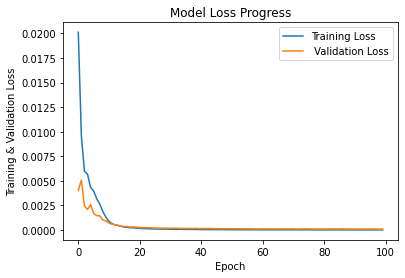

In [31]:
plt.plot(epoch_hist.history['loss'])
plt.plot(epoch_hist.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Training & Validation Loss')
plt.title('Model Loss Progress')
plt.legend(['Training Loss', ' Validation Loss'])

In [32]:
# ['pH',	'DO',	'TDS',	'Alkalinity',	'EC',	'Na',	'Ca',	'Mg',	'K',	'F',	'Cl',	'Nitrate',	'Sulphate',	'Phosphate' ]
X_test_1 = np.array([[8.14,	8.7,	84.0,	52,	147.8,	4.48,	44,	20,	1.17,	0.285,	7.80,	0.758000,	6.534660,	0.06211]])
scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)
y_pred_1 = model.predict(X_test_scaled_1)

In [33]:
y_pred_1

array([[-0.01646956]], dtype=float32)

In [34]:
scaler.inverse_transform(y_pred_1)

array([[0.07881296]], dtype=float32)

In [35]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'True Values')

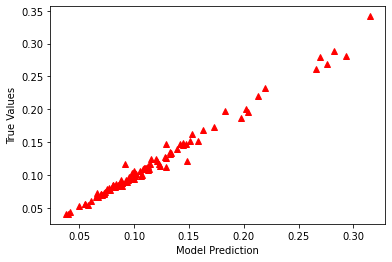

In [36]:
plt.plot(y_test, y_pred, "^", color='r')
plt.xlabel('Model Prediction')
plt.ylabel('True Values')

In [37]:
# Get no scaled data
y_pred_orginal = scaler.inverse_transform(y_pred)
y_test_orginal = scaler.inverse_transform(y_test)

(0.0, 1.0)

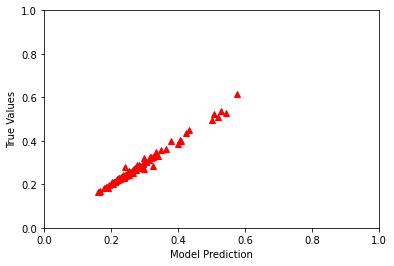

In [38]:
plt.plot(y_test_orginal, y_pred_orginal, "^", color='r')
plt.xlabel('Model Prediction')
plt.ylabel('True Values')
plt.xlim(0,1)
plt.ylim(0,1)

In [39]:
# Get number of independent params
k = X_test.shape[1]
# Get length of test data
n = len(X_test)

In [40]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orginal, y_pred_orginal)), '.3f'))
MSE = float(format(mean_squared_error(y_test_orginal, y_pred_orginal), '.3f'))
MAE = float(format(mean_absolute_error(y_test_orginal, y_pred_orginal), '.3f'))
r2 = float(format(r2_score(y_test_orginal, y_pred_orginal), '.3f'))
adj_r2 = float(format(1-(1-r2)*(n-1)/(n-k-1), '.3f'))
# MAPE = float(format(np.mean(np.abs((y_test_orginal-y_pred_orginal)/y_test_orginal))*100, '.3f'))

In [41]:
print('RMSE: ', RMSE)
print('MSE: ', MSE)
print('MAE: ', MAE)
print('r2: ', r2)
print('adj_r2: ', adj_r2)
# print('MAPE: ', MAPE)

RMSE:  0.01
MSE:  0.0
MAE:  0.007
r2:  0.985
adj_r2:  0.982


Multiple regression model

In [42]:
# Create train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state = 5)

In [43]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)

In [44]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_pred_reg = reg.predict(X_test)

In [46]:
y_pred_reg.shape

(97, 1)

In [47]:
print('Linear Model Coefficient (m)', reg.coef_)
print('Linear Model Coefficient (b)', reg.intercept_)

Linear Model Coefficient (m) [[ 4.76190476e-02 -7.44047620e-03  1.42857139e-04  3.57142858e-04
   8.92857155e-05  3.57142842e-04  9.52380953e-04  1.76871958e-12
   7.14285699e-04  4.76190476e-02  2.85714301e-04  1.58730161e-03
   2.85714287e-04  7.14285714e-01]]
Linear Model Coefficient (b) [-0.22470238]


Text(0.5, 1.0, ' Multiple Linear Regression Predictions')

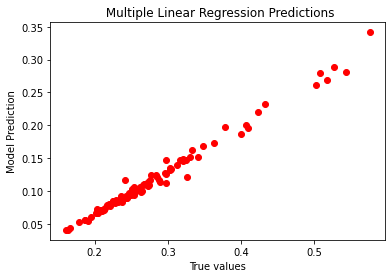

In [48]:
plt.scatter(y_test, y_pred, color = 'r')
plt.ylabel('Model Prediction')
plt.xlabel('True values')
plt.title(' Multiple Linear Regression Predictions')

In [49]:
# Get number of independent params
k = X_test.shape[1]
# Get length of test data
n = len(X_test)

In [50]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred_reg)), '.3f'))
MSE = float(format(mean_squared_error(y_test, y_pred_reg), '.3f'))
MAE = float(format(mean_absolute_error(y_test, y_pred_reg), '.3f'))
r2 = float(format(r2_score(y_test, y_pred_reg), '.3f'))
adj_r2 = float(format(1-(1-r2)*(n-1)/(n-k-1), '.3f'))
MAPE = float(format(np.mean(np.abs((y_test-y_pred_reg)/y_test))*100, '.3f'))

In [51]:
print('RMSE: ', RMSE)
print('MSE: ', MSE)
print('MAE: ', MAE)
print('r2: ', r2)
print('adj_r2: ', adj_r2)
print('MAPE: ', MAPE)

RMSE:  0.0
MSE:  0.0
MAE:  0.0
r2:  1.0
adj_r2:  1.0
MAPE:  0.0


In [52]:
# Print accuracy
reg.score(X_test, y_test)

1.0